In [2]:
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
import pandas as pd

Two variables in snp452-data.mat: \
stock(code, name, class),\
X (n*p size):  n=1258 (time/date), p=452 (stock price) 

In [34]:
import scipy.io as scio

# data = scio.loadmat('./X-snp452-data.mat')
# print('.mat data:\n',type(data))
# print(data)
# X = np.array(data['X'])

data = scio.loadmat('./snp452-data.mat')
print('.mat data:',type(data))
X = np.array(data['X'])

print()
X = X.T
print('X:', type(X), X.shape)
p = X.shape[0]
n = X.shape[1]
# print(p,n)

.mat data: <class 'dict'>

X: <class 'numpy.ndarray'> (452, 1258)


In [69]:
Y = np.log(X)
dy = np.diff(Y, axis=1)
print(dy.shape)
cov = 1/(n-1)* np.dot(dy, dy.T)
print(cov.shape)

# or calculated as
if 0:
    cov1 = np.cov(dy)
    print(cov.shape,cov1.shape)
    print(cov)
    print()
    print(cov1)

(452, 1257)
(452, 452)


In [67]:
values, vectors = alg.eig(cov)
sort_des_id = np.argsort(values)[::-1]  # [::-1] is for reverse the whole array, then obtaining the descending indeces
eigenvalues = values[sort_des_id]
eigenvectors = vectors[sort_des_id]

if 0:
    a = np.array([5,4,3,1,2])
    b = np.argsort(a)[::-1]
    d = a[b]

    c = np.sort(a)[::-1]

    print(b)
    print(d)
    print(c)

In [80]:
# random permutation ('r' means random)
# repeat R=100 times

R = 100
N = np.zeros(p)
for j in range(R):
    dy_r = np.zeros(dy.shape)  # p*n
    for i in range(p):  # each row
        perm = np.random.permutation(n-1)  # a random permutation pi of the numbers [1 to n]
        dy_r[i,:] = dy[i,perm]


    # covirance matrix
    cov_r = 1/(n-1)* np.dot(dy_r, dy_r.T)

    values_r, vectors_r = alg.eig(cov_r)
    sort_des_id = np.argsort(values_r)[::-1]  # [::-1] is for reverse the whole array, then obtaining the descending indeces
    eigenvalues_r = values_r[sort_des_id]
    eigenvectors_r = vectors_r[sort_des_id]
    
    for i in range(p):
        if eigenvalues[i] < eigenvalues_r[i]:
            N[i] += 1


            
# Or, direct permutation on the cov matrix
# cov_r = np.zeros(cov.shape)  # p*p
# for i in range(p):  # each row
#     perm = np.random.permutation(p)  # a random permutation pi of the numbers [1 to p]
#     cov_r[i,:] = cov[i,perm]

Eigenvalues with small p-values (small $N[i]$) indicate
that they are less likely arising from the spectrum of a randomly permuted matrix
and thus considered to be signal.

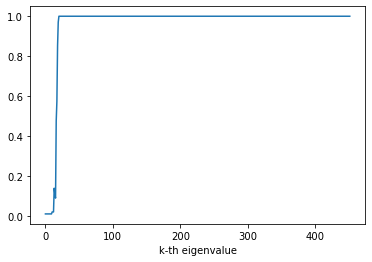

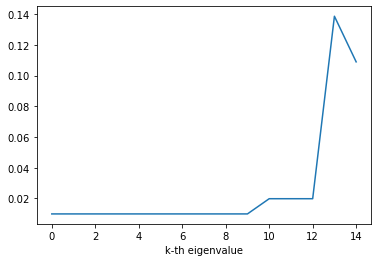

In [85]:
p_values = [(N[i]+1)/(R+1) for i in range(p)]
plt.figure()
plt.plot(p_values[:])
plt.xlabel('k-th eigenvalue');
plt.figure()
plt.plot(p_values[:15])
plt.xlabel('k-th eigenvalue');


Or, direct permutation on the cov matrix

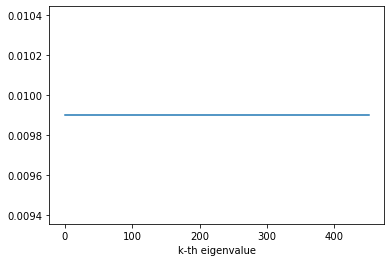

In [86]:
# Or, direct permutation on the cov matrix
R = 100
N = np.zeros(p)
for j in range(R):
    cov_r = np.zeros(cov.shape)  # p*p
    for i in range(p):  # each row
        perm = np.random.permutation(p)  # a random permutation pi of the numbers [1 to p]
        cov_r[i,:] = cov[i,perm]
        
    values_r, vectors_r = alg.eig(cov_r)
    sort_des_id = np.argsort(values_r)[::-1]  # [::-1] is for reverse the whole array, then obtaining the descending indeces
    eigenvalues_r = values_r[sort_des_id]
    eigenvectors_r = vectors_r[sort_des_id]
    
    for i in range(p):
        if eigenvalues[i] < eigenvalues_r[i]:
            N[i] += 1
            
p_values = [(N[i]+1)/(R+1) for i in range(p)]
plt.plot(p_values)
plt.xlabel('k-th eigenvalue');